# 案例：信用卡交易欺诈数据预测

### 1 背景
#### 有一批交易数据，数据总量达到28万多条。其中，正常交易数据量占比99.83%，欺诈交易数据量仅占比0.17%，此案例属于一个典型的不平衡数据案例。

### 2 目标
#### 训练出一个模型，能够判断出欺诈交易数据。

### 3 案例流程

### 方案一：
#### ① 针对不平衡数据案例，这里采取的是under_sample（下采样）方式，使得正负样例的数据均衡；
#### ② 由于欺诈的交易数据有：492条，因此，我们将从正常的交易数据中随机选择492条。这样新的数据集将有984条数据；
#### ③ 基于新的数据集，我们分成：train, test 进行训练、预测。最终，利用集成学习技术来进行预测；
#### ④ 采用交叉验证的技术，进行训练、预测；
#### ⑤ 绘制学习曲线；
#### ⑥ 绘制ROC曲线；

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 加载数据文件
df = pd.read_csv("creditcard.csv")

In [3]:
df.shape

(284807, 31)

In [4]:
# 查看默认的前5行数据
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# 查看数据的信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# 查看数据的描述
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# 检查是否有空置
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# 查看数据类型
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

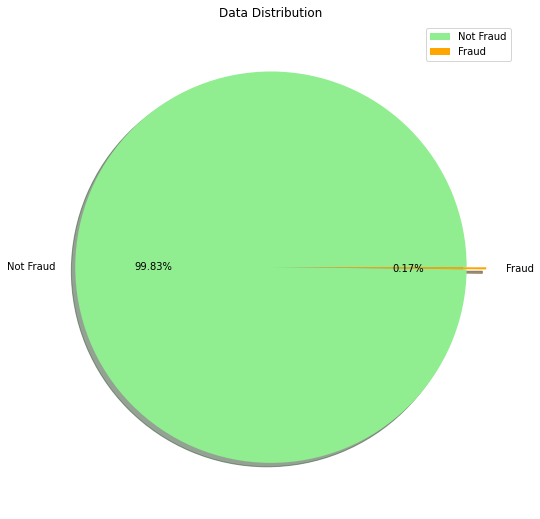

In [9]:
# 查看Class分布
labels = ['Not Fraud', 'Fraud'] # 标签
size = df['Class'].value_counts() # 统计class的类别数量
colors = ['lightgreen', 'orange'] # 颜色
explode = [0, 0.1] # 饼图突出
plt.figure(figsize=(9,9)) # 画布大小
plt.pie(size, colors=colors, explode=explode, labels=labels, shadow=True, autopct='%.2f%%') # 饼图参数设置
plt.axis('off') # 关闭坐标轴
plt.title("Data Distribution") # 标题
plt.legend() # 显示标签
plt.show() # 显示

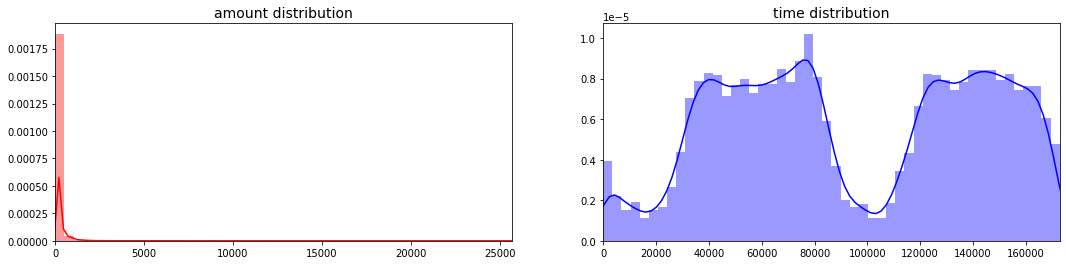

In [10]:
# 显示交易时间、交易金额的分布
fig, ax = plt.subplots(1, 2, figsize=(18, 4)) # 画布大小

amout_val = df['Amount'].values # 交易金额的数值
time_val = df['Time'].values # 交易时间的数值

sns.distplot(amout_val, ax=ax[0], color='r') # 参数设置
ax[0].set_title('amount distribution', fontsize=14) # 标题
ax[0].set_xlim(min(amout_val), max(amout_val)) # 横轴设置

sns.distplot(time_val, ax=ax[1], color='b') # 参数设置
ax[1].set_title('time distribution', fontsize=14) # 标题
ax[1].set_xlim(min(time_val), max(time_val)) # 横轴设置

plt.show()

In [11]:
# 数据表中的大多数列的数据已经归一化，接下来对Amount进行归一化
from sklearn.preprocessing import StandardScaler

df['scaled_amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1)) # 金额归一化
df['scaled_time'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1,1)) # 时间归一化

df.drop(['Amount', 'Time'], axis=1, inplace=True) # 删除原始的数据列

In [12]:
df.head() # 默认显示前5行

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [13]:
# under_sampling 方法

normal_data_indices = df[df['Class']==0].index # 正常交易数据的索引

In [14]:
# 正常交易数据的数量
len(normal_data_indices)

284315

In [15]:
fraud_data_number = len(df[df['Class']==1]) # 欺诈交易数据的数量

fraud_data_number

492

In [16]:
fraud__data_indices = df[df['Class']==1].index # 欺诈交易数据的索引

In [17]:
# 从正常交易数据中随机选择492个，与欺诈交易数据组成一个新的数据集，使得两者的数量均衡

random_normal_data_indices = np.random.choice(normal_data_indices, fraud_data_number, replace=False) # replace=False,表示不放回随机抽样

In [18]:
len(random_normal_data_indices)

492

In [19]:
# 合并 随机抽取的正常交易数据的索引 和 欺诈交易数据的索引
under_sample_indices = np.concatenate([fraud__data_indices, random_normal_data_indices])

In [20]:
# under sample dataset 下采样的数据集
under_sample_dataset = df.iloc[under_sample_indices, :]

In [21]:
# 数据集 和 标签集
X_under_sample = under_sample_dataset.drop('Class', axis=1) # 数据集
y_under_sample = under_sample_dataset['Class'] # 标签集

In [22]:
X_under_sample.shape

(984, 30)

In [23]:
y_under_sample.shape

(984,)

In [24]:
print("欺诈交易的占比：", under_sample_dataset[under_sample_dataset['Class']==1].shape[0] / under_sample_dataset.shape[0] * 100,"%")

欺诈交易的占比： 50.0 %


In [25]:
print("正常交易的占比：", under_sample_dataset[under_sample_dataset['Class']==0].shape[0] / under_sample_dataset.shape[0] * 100,"%")

正常交易的占比： 50.0 %


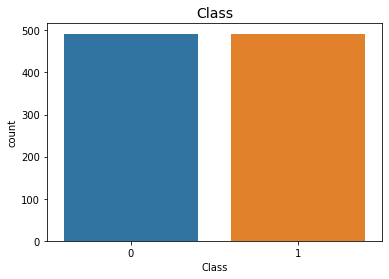

In [26]:
# 查看新的数据集的分布
sns.countplot('Class', data=under_sample_dataset)
plt.title("Class", fontsize=14)
plt.show()

### 原始的整个数据集分割 : train, test

In [27]:
# 数据集分割：训练集和测试集
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1) # 数据集
y = df['Class'] # 标签

#kFold = StratifiedKFold(n_splits=5, random_state=666, shuffle=True) # 5折交叉验证

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [28]:
# 数据集
X_train = X_train.values
X_test = X_test.values
# 标签
y_train = y_train.values
y_test = y_test.values

In [29]:
X_train.shape

(227845, 30)

In [30]:
X_test.shape

(56962, 30)

### 新的数据集分割：train, test

In [31]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_under_sample, y_under_sample, test_size=0.2, random_state=666)

In [32]:
X_new_train.shape

(787, 30)

In [33]:
X_new_test.shape

(197, 30)

### 关系矩阵

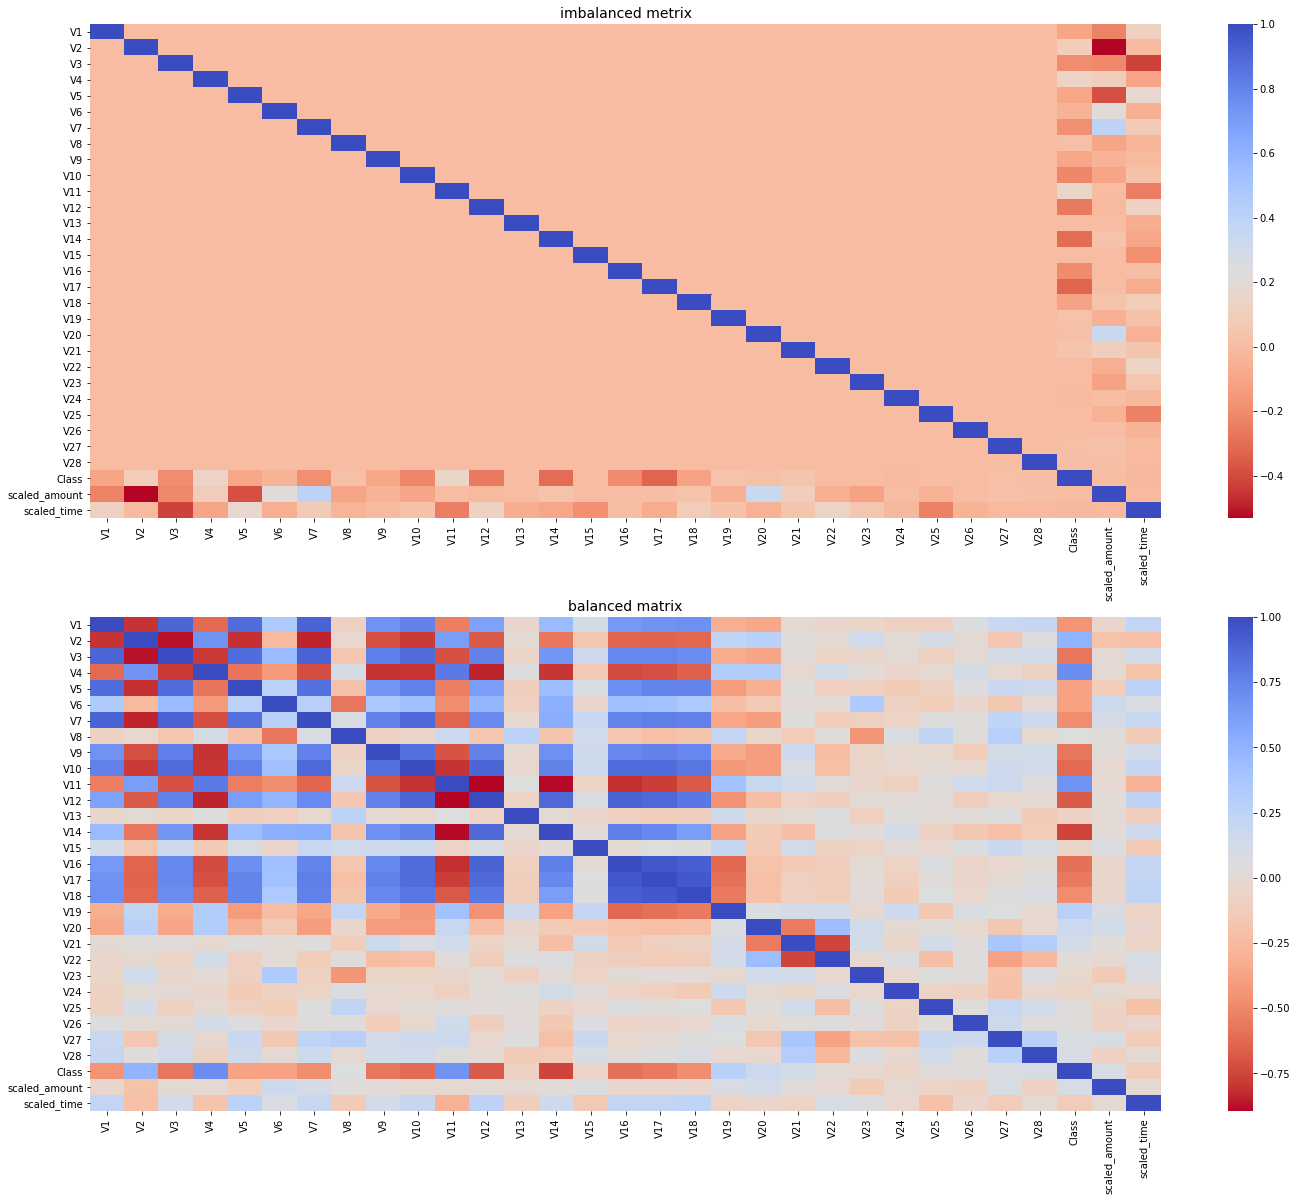

In [34]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20)) # 画布大小

# 整个DataFrame
corr = df.corr() # 相关系数
sns.heatmap(corr,cmap='coolwarm_r', annot_kws={'size':20},ax=ax1)
ax1.set_title("imbalanced metrix", fontsize=14)

# 新的DataFrame
df_corr = under_sample_dataset.corr() 
sns.heatmap(df_corr, cmap='coolwarm_r',annot_kws={'size':20}, ax=ax2)
ax2.set_title("balanced matrix", fontsize=14)

plt.show()

### 模型训练

In [35]:
# 简单分类器实现
from sklearn.linear_model import LogisticRegression # 逻辑回归
from sklearn.linear_model import SGDClassifier      # 随机梯度
from sklearn.neighbors import KNeighborsClassifier  # K近邻
from sklearn.svm import SVC                         # 支撑向量机
from sklearn.tree import DecisionTreeClassifier     # 决策树
from sklearn.ensemble import RandomForestClassifier # 随机森林
from sklearn.model_selection import cross_val_score # 交叉验证计算accuracy
from sklearn.model_selection import GridSearchCV    # 网格搜索，获取最优参数
from sklearn.model_selection import StratifiedKFold # 交叉验证
from collections import Counter
# 评估指标
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier # 集成学习
from xgboost import XGBClassifier                   # 极限梯度提升树

classifiers = {
    'LogisticRegression':LogisticRegression(), # 逻辑回归
    "SVC":SVC(),                               # 支撑向量机
    "KNN":KNeighborsClassifier(),              # K近邻
    'DT':DecisionTreeClassifier(),             # 决策树
    'RFC':RandomForestClassifier(),            # 随机森林
    'Bagging':BaggingClassifier(),             # 集成学习bagging
    'SGD':SGDClassifier(),                     # 随机梯度
    'GBC':GradientBoostingClassifier(),        # 集成学习Gradient
    'xgb':XGBClassifier()                      # 极限梯度提升树
}

In [36]:
def accuracy_score(X_train, y_train):
    for key, classifier in classifiers.items(): # 遍历每一个分类器，分别训练、计算得分
        classifier.fit(X_train, y_train)
        training_score = cross_val_score(classifier, X_train, y_train, cv=5) # 5折交叉验证
        print("Classifier Name : ", classifier.__class__.__name__,"  Training Score ：", round(training_score.mean(), 2)*100,'%')

### 1 最简单的交叉验证

In [38]:
# 1.1 使用原始数据集【注意：不可取】
accuracy_score(X_train, y_train)

Classifier Name :  LogisticRegression   Training Score ： 100.0 %
Classifier Name :  SVC   Training Score ： 100.0 %
Classifier Name :  KNeighborsClassifier   Training Score ： 100.0 %
Classifier Name :  DecisionTreeClassifier   Training Score ： 100.0 %
Classifier Name :  RandomForestClassifier   Training Score ： 100.0 %
Classifier Name :  BaggingClassifier   Training Score ： 100.0 %
Classifier Name :  SGDClassifier   Training Score ： 100.0 %
Classifier Name :  GradientBoostingClassifier   Training Score ： 100.0 %
Classifier Name :  XGBClassifier   Training Score ： 100.0 %


In [40]:
# 1.2 使用新的数据集
accuracy_score(X_new_train, y_new_train)

Classifier Name :  LogisticRegression   Training Score ： 95.0 %
Classifier Name :  SVC   Training Score ： 94.0 %
Classifier Name :  KNeighborsClassifier   Training Score ： 93.0 %
Classifier Name :  DecisionTreeClassifier   Training Score ： 91.0 %
Classifier Name :  RandomForestClassifier   Training Score ： 94.0 %
Classifier Name :  BaggingClassifier   Training Score ： 94.0 %
Classifier Name :  SGDClassifier   Training Score ： 93.0 %
Classifier Name :  GradientBoostingClassifier   Training Score ： 93.0 %
Classifier Name :  XGBClassifier   Training Score ： 94.0 %


### 2 网格搜索：获取最优超参数

In [41]:
# 网格搜索：获取最优超参数
# 1 LR
def LR_gs(X_train, y_train):
    # LR
    LR_param = {
        'penalty':['l1', 'l2'],
        'C':[0.001, 0.01, 0.1, 1, 10]
    }

    LR_gs = GridSearchCV(LogisticRegression(),param_grid=LR_param, n_jobs=-1, scoring='accuracy')
    LR_gs.fit(X_train, y_train)

    LR_estimators = LR_gs.best_estimator_ # 最优参数
    
    return LR_estimators

In [42]:
# 2 KNN
def KNN_gs(X_train, y_train):
    KNN_param = {
        'n_neighbors':list(range(2, 5, 1)),
        'algorithm':['auto','ball_tree','kd_tree','brute']
    }

    KNN_gs = GridSearchCV(KNeighborsClassifier(), param_grid=KNN_param, n_jobs=-1, scoring='accuracy')
    KNN_gs.fit(X_train, y_train)

    KNN_estimators = KNN_gs.best_estimator_ # 最优参数
    
    return KNN_estimators

In [43]:
# 3 SVC
def SVC_gs(X_train, y_train):
    SVC_param = {
        'C':[0.5, 0.7, 0.9, 1],
        'kernel':['rfb', 'poly', 'sigmod', 'linear']
    }

    SVC_gs = GridSearchCV(SVC(), param_grid=SVC_param, n_jobs=-1, scoring='accuracy')
    SVC_gs.fit(X_train, y_train)

    SVC_estimators = SVC_gs.best_estimator_ # 最优参数
    
    return SVC_estimators

In [44]:
# 4 DT
def DT_gs(X_train, y_train):
    DT_param = {
        'criterion':['gini', 'entropy'], # 衡量标准
        'max_depth':list(range(2, 5, 1)), # 树的深度
        'min_samples_leaf':list(range(3, 7, 1)) # 最小叶子节点数
    }

    DT_gs = GridSearchCV(DecisionTreeClassifier(), param_grid=DT_param, n_jobs=-1, scoring='accuracy')
    DT_gs.fit(X_train, y_train)

    DT_estimators = DT_gs.best_estimator_ # 最优参数
    
    return DT_estimators

In [45]:
# 5 RFC
def RFC_gs(X_train, y_train):
    RFC_param = {
        'n_estimators':[100, 150, 200], # 多少棵树
        'criterion':['gini', 'entropy'], # 衡量标准
        'max_depth':list(range(2,5,1)), # 树的深度
    }
    
    RFC_gs = GridSearchCV(RandomForestClassifier(), param_grid=RFC_param, n_jobs=-1, scoring='accuracy')
    RFC_gs.fit(X_train, y_train)
    
    RFC_estimators = RFC_gs.best_estimator_
    
    return RFC_estimators

In [46]:
# 6 Bag
def BAG_gs(X_train, y_train):
    BAG_param = {
        'n_estimators':[10, 15, 20]
    }
    
    BAG_gs = GridSearchCV(BaggingClassifier(), param_grid=BAG_param, n_jobs=-1, scoring='accuracy')
    BAG_gs.fit(X_train, y_train)
    
    BAG_estimators = BAG_gs.best_estimator_
    
    return BAG_estimators

In [47]:
# 7 SGD
def SGD_gs(X_train, y_train):
    SGD_param = {
        'penalty':['l2','l1'],
        'max_iter':[1000, 1500, 2000]
    }
    
    SGD_gs = GridSearchCV(SGDClassifier(), param_grid=SGD_param, n_jobs=-1, scoring='accuracy')
    SGD_gs.fit(X_train, y_train)
    
    SGD_estimators = SGD_gs.best_estimator_
    
    return SGD_estimators

In [48]:
# 8 xgb
def XGB_gs(X_train, y_train):
    XGB_param = {
        'max_depth':[3,4,5,6]
    }
    
    XGB_gs = GridSearchCV(XGBClassifier(), param_grid=XGB_param, n_jobs=-1, scoring='accuracy')
    XGB_gs.fit(X_train, y_train)
    
    XGB_estimators = XGB_gs.best_estimator_
    
    return XGB_estimators

In [49]:
# 采用新的数据集：X_new_train, y_new_train

# 模型交叉验证、训练，获取最优超参数

LR_best_estimator = LR_gs(X_new_train, y_new_train)

KNN_best_estimator = KNN_gs(X_new_train, y_new_train)

SVC_best_estimator = SVC_gs(X_new_train, y_new_train)

DT_best_estimator = DT_gs(X_new_train, y_new_train)

RFC_best_estimator = RFC_gs(X_new_train, y_new_train)

BAG_best_estimator = BAG_gs(X_new_train, y_new_train)

SGD_best_estimator = SGD_gs(X_new_train, y_new_train)

XGB_best_estimator = XGB_gs(X_new_train, y_new_train)

In [53]:
# 预测新的数据集：X_new_test, y_new_test
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

result_df = pd.DataFrame(columns=['Accuracy', 'F1-score', 'Recall', 'Precision', 'AUC_ROC'],
                         index=['LR','KNN','SVC','DT','RFC','Bagging','SGD','XGB'])

def caculate(models, X_test, y_test):
    # 计算各种参数的值
    accuracy_results = []
    F1_score_results = []
    Recall_results = []
    Precision_results = []
    AUC_ROC_results = []
    
    for model in models:
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred) # 计算准确度
        precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred) # 计算：精确度，召回率，f1_score
        AUC_ROC = roc_auc_score(y_test, y_pred) # 计算AUC
        
        # 保存计算值
        accuracy_results.append(accuracy)
        F1_score_results.append(f1_score)
        Recall_results.append(recall)
        AUC_ROC_results.append(AUC_ROC)
        Precision_results.append(precision)
        
    return accuracy_results, F1_score_results, Recall_results, AUC_ROC_results, Precision_results

In [54]:
# 将所有最优超参数的模型放在一起
best_models = [LR_best_estimator, KNN_best_estimator, SVC_best_estimator, DT_best_estimator, RFC_best_estimator,
               BAG_best_estimator, SGD_best_estimator, XGB_best_estimator]

# 调用函数计算各项指标值
accuracy_results, F1_score_results, Recall_results, AUC_ROC_results, Precision_results = caculate(best_models, X_new_test, y_new_test)

# 将各项值放入到DataFrame中
result_df['Accuracy'] = accuracy_results
result_df['F1-score'] = F1_score_results
result_df['Recall'] = Recall_results
result_df['Precision'] = Precision_results
result_df['AUC_ROC'] = AUC_ROC_results

In [55]:
result_df # 显示计算结果

,Accuracy,F1-score,Recall,Precision,AUC_ROC
LR,0.944162,"[0.9473684210526315, 0.9405405405405406]","[0.9705882352941176, 0.9157894736842105]","[0.9252336448598131, 0.9666666666666667]",0.943189
KNN,0.928934,"[0.9339622641509434, 0.9230769230769231]","[0.9705882352941176, 0.8842105263157894]","[0.9, 0.9655172413793104]",0.927399
SVC,0.944162,"[0.9473684210526315, 0.9405405405405406]","[0.9705882352941176, 0.9157894736842105]","[0.9252336448598131, 0.9666666666666667]",0.943189
DT,0.908629,"[0.9150943396226415, 0.901098901098901]","[0.9509803921568627, 0.8631578947368421]","[0.8818181818181818, 0.9425287356321839]",0.907069
RFC,0.923858,"[0.9302325581395348, 0.9162011173184357]","[0.9803921568627451, 0.8631578947368421]","[0.8849557522123894, 0.9761904761904762]",0.921775
Bagging,0.928934,"[0.9345794392523364, 0.9222222222222223]","[0.9803921568627451, 0.8736842105263158]","[0.8928571428571429, 0.9764705882352941]",0.927038
SGD,0.923858,"[0.9275362318840579, 0.9197860962566845]","[0.9411764705882353, 0.9052631578947369]","[0.9142857142857143, 0.9347826086956522]",0.923220
XGB,0.939086,"[0.9433962264150944, 0.9340659340659342]","[0.9803921568627451, 0.8947368421052632]","[0.9090909090909091, 0.9770114942528736]",0.937564


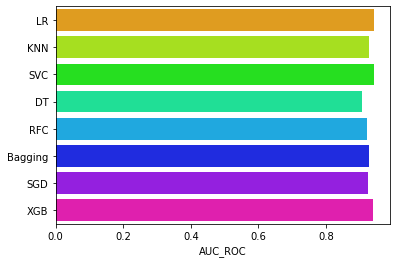

In [96]:
# 可视化 AUC的评分
g = sns.barplot('AUC_ROC', result_df.index, data=result_df, palette='hsv', orient='h')

In [97]:
# 集成学习

# 根据以上AUC的结果,选择: LR 和 SVC 和 XGB 当做基模型

LR_test = pd.Series(LR_best_estimator.predict(X_new_test), name = 'LR')

SVC_test = pd.Series(SVC_best_estimator.predict(X_new_test),name = 'SVC')

XGB_test = pd.Series(XGB_best_estimator.predict(X_new_test), name='XGB')

In [98]:
# 把以上3个模型的预测结果集成起来
ensemble_results = pd.concat([LR_test, SVC_test, XGB_test], axis=1)

In [99]:
ensemble_results

,LR,SVC,XGB
0,0,0,0
1,1,1,1
2,0,0,0
3,1,1,1
4,1,1,1
...,...,...,...
192,1,1,1
193,0,0,0
194,0,0,0
195,1,1,1


In [100]:
# 将上述3个模型集成起来，当做一个模型
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[('LR', LR_best_estimator), ('SVC', SVC_best_estimator), 
                                          ('XGB', XGB_best_estimator)], n_jobs=-1)

In [106]:
# 训练
voting_clf.fit(X_new_train, y_new_train)

VotingClassifier(estimators=[('LR', LogisticRegression(C=10)),
                             ('SVC', SVC(C=0.5, kernel='linear')),
                             ('XGB',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=3,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=100, n_jobs=0,
                                    

In [116]:
# 预测
y_final_pred = voting_clf.predict(X_new_test)

In [117]:
# 评估结果 ： 最终集成学习预测的结果明显高于之前各个模型单独预测的结果

print(classification_report(y_new_test, y_final_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       102
           1       0.98      0.92      0.95        95

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



### 绘制学习曲线

### 用整个新的数据集进行交叉验证训练，并绘制学习曲线

In [67]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(models, names, X, y, ylim=None, cv=None, n_jobs=-1):
    f, ax = plt.subplots(8, 1, figsize=(20, 50))
    if ylim is not None:
        plt.ylim(*ylim)
    for i in range(len(models)):
        train_sizes, train_scores, test_scores = learning_curve(models[i], X, y, cv=cv, n_jobs=n_jobs)

        train_scores_mean = np.mean(train_scores, axis=1)

        test_scores_mean = np.mean(test_scores, axis=1)

        ax[i].plot(train_sizes, train_scores_mean, 'o-', color="#ff9124", label='Training score')
        ax[i].plot(train_sizes, test_scores_mean, '+-', color='#2492ff', label='cross-validation score')

        ax[i].set_title(names[i], fontsize=14)
        ax[i].set_xlabel('Training size(m)')
        ax[i].set_ylabel('Score')
        ax[i].grid(True)
        ax[i].legend(loc='best')

In [68]:
cv = ShuffleSplit(n_splits=5, random_state=666, test_size=0.2) # 切分的比例

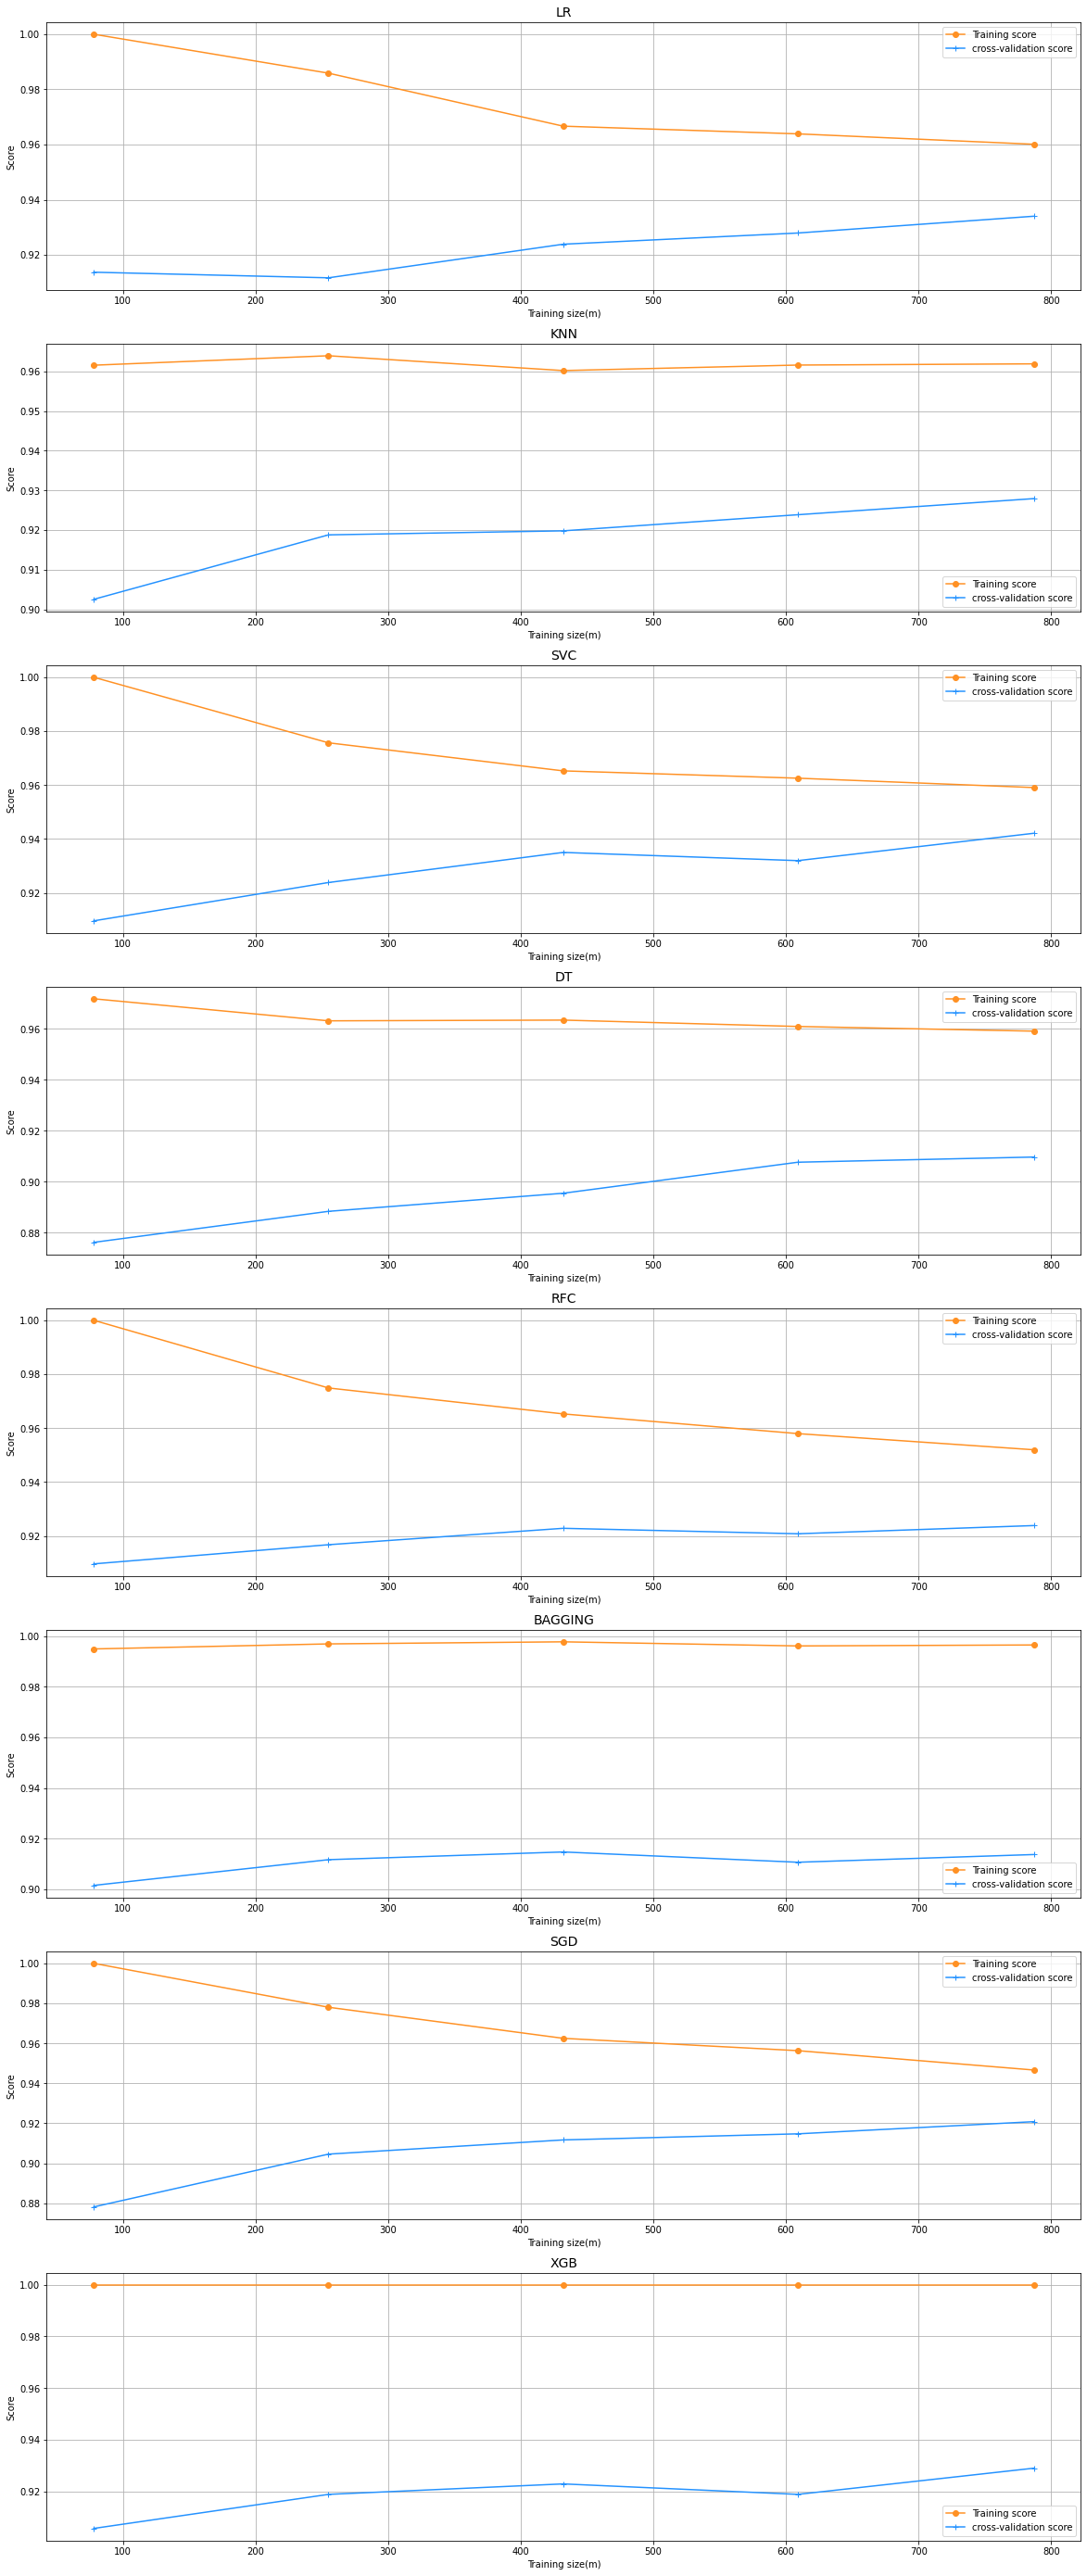

In [69]:
# 绘制各个模型的学习曲线
best_models = [LR_best_estimator, KNN_best_estimator, SVC_best_estimator, DT_best_estimator, RFC_best_estimator,
               BAG_best_estimator, SGD_best_estimator, XGB_best_estimator]

names = ['LR', 'KNN', 'SVC', 'DT', 'RFC', 'BAGGING', 'SGD', 'XGB']

plot_learning_curve(best_models, names, X_under_sample, y_under_sample, cv=cv)

### 绘制ROC曲线

In [70]:
from sklearn.model_selection import cross_val_predict

LR_pred = cross_val_predict(LR_best_estimator, X_under_sample, y_under_sample, cv=5)
KNN_pred = cross_val_predict(KNN_best_estimator, X_under_sample, y_under_sample, cv=5)
SVC_pred = cross_val_predict(SVC_best_estimator, X_under_sample, y_under_sample, cv=5)
DT_pred = cross_val_predict(DT_best_estimator, X_under_sample, y_under_sample, cv=5)
RFC_pred = cross_val_predict(RFC_best_estimator, X_under_sample, y_under_sample, cv=5)
BAG_pred = cross_val_predict(BAG_best_estimator, X_under_sample, y_under_sample, cv=5)
SGD_pred = cross_val_predict(SGD_best_estimator, X_under_sample, y_under_sample, cv=5)
XGB_pred = cross_val_predict(XGB_best_estimator, X_under_sample, y_under_sample, cv=5)

In [71]:
# 计算auc的评分
print('LR roc_auc_score :', roc_auc_score(y_under_sample, LR_pred))
print('KNN roc_auc_score :', roc_auc_score(y_under_sample, KNN_pred))
print('DT roc_auc_score :', roc_auc_score(y_under_sample, DT_pred))
print('SVC roc_auc_score :', roc_auc_score(y_under_sample, SVC_pred))
print('RFC_score :', roc_auc_score(y_under_sample, RFC_pred))
print('BAG_score :', roc_auc_score(y_under_sample, BAG_pred))
print('SGD_score :', roc_auc_score(y_under_sample, SGD_pred))
print('XGB_score :', roc_auc_score(y_under_sample, XGB_pred))

LR roc_auc_score : 0.9258130081300815
KNN roc_auc_score : 0.9247967479674797
DT roc_auc_score : 0.9146341463414633
SVC roc_auc_score : 0.926829268292683
RFC_score : 0.9339430894308943
BAG_score : 0.842479674796748
SGD_score : 0.9166666666666667
XGB_score : 0.9288617886178862


In [73]:
# 计算每个模型的 fpr, tpr
from sklearn.metrics import roc_curve

LR_fpr, LR_tpr, LR_threshold = roc_curve(y_under_sample, LR_pred)

KNN_fpr, KNN_tpr, KNN_threshold = roc_curve(y_under_sample, KNN_pred)

DT_fpr, DT_tpr, DT_threshold = roc_curve(y_under_sample, DT_pred)

SVC_fpr, SVC_tpr, SVC_threshold = roc_curve(y_under_sample, SVC_pred)

RFC_fpr, RFC_tpr, RFC_threshold = roc_curve(y_under_sample, RFC_pred)

BAG_fpr, BAG_tpr, BAG_threshold = roc_curve(y_under_sample, BAG_pred)

SGD_fpr, SGD_tpr, SGD_threshold = roc_curve(y_under_sample, SGD_pred)

XGB_fpr, XGB_tpr, XGB_threshold = roc_curve(y_under_sample, XGB_pred)

In [81]:
# 绘制roc曲线
def graph_roc(fpr, tpr, name, score):
    plt.figure(figsize=(16,8)) # 画布大小
    plt.title("ROC Curve", fontsize=14)
    plt.plot(fpr, tpr, label=name+":"+ str(score))
    plt.axis([-0.01, 1, 0, 1]) # 坐标轴
    plt.xlabel("False Positive Rate (FPR)", fontsize=14)
    plt.ylabel("True Positive Rate (TPR)", fontsize=14)
    plt.legend()
    plt.show()

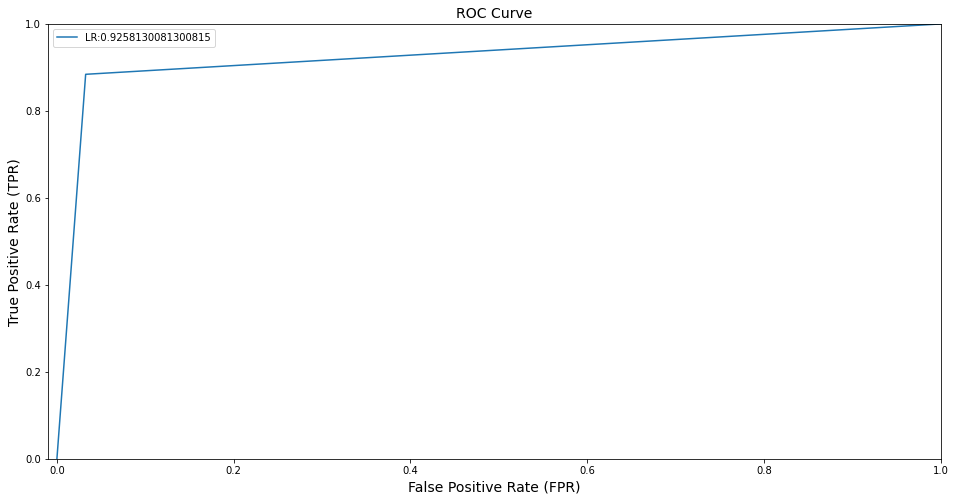

In [84]:
# 1 LR AUC
graph_roc(LR_fpr, LR_tpr, 'LR', roc_auc_score(y_under_sample, LR_pred))

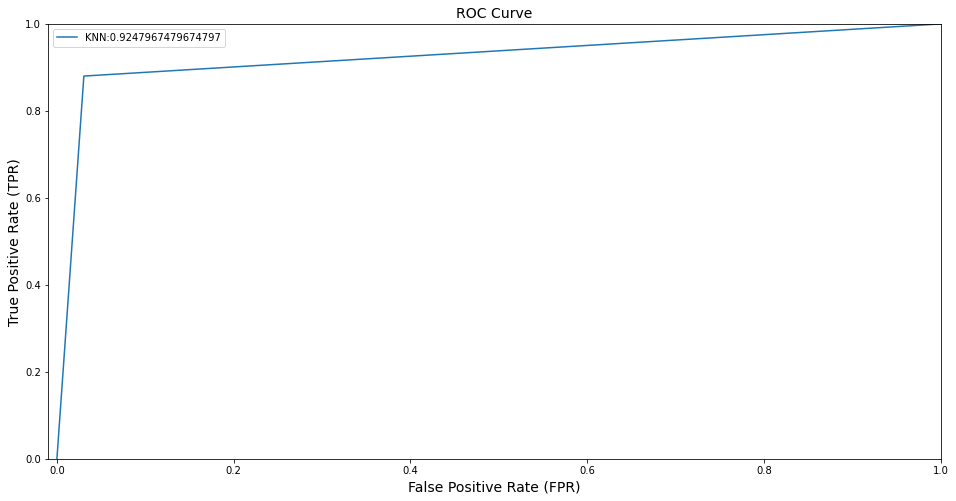

In [85]:
# 2 KNN AUC
graph_roc(KNN_fpr, KNN_tpr, 'KNN', roc_auc_score(y_under_sample, KNN_pred))

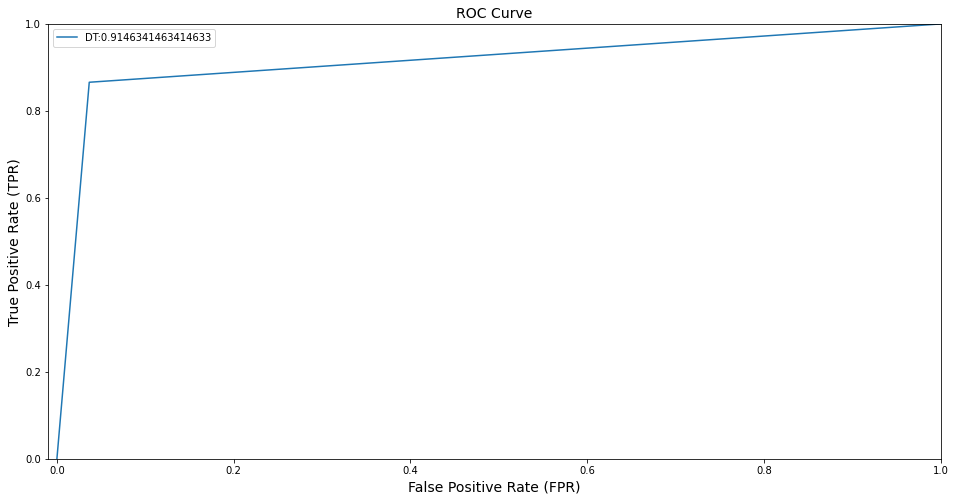

In [86]:
# 3 DT AUC
graph_roc(DT_fpr, DT_tpr, 'DT', roc_auc_score(y_under_sample, DT_pred))

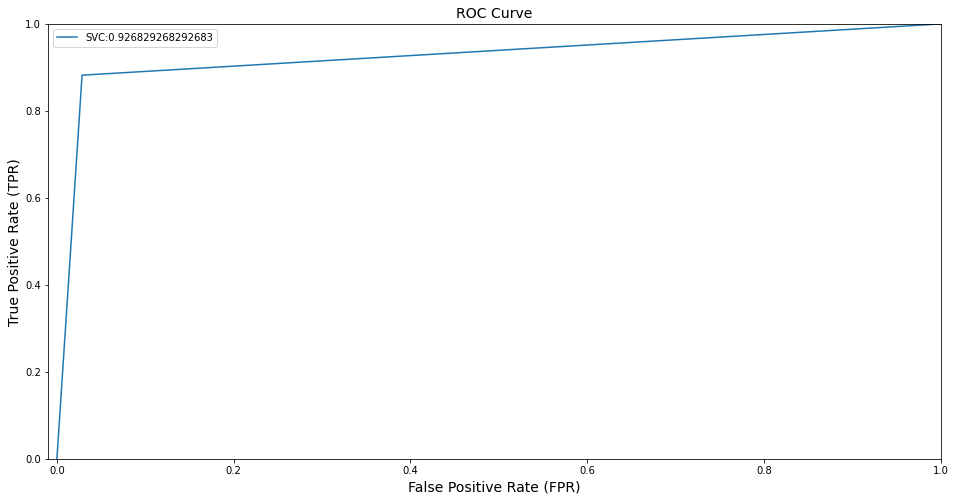

In [87]:
# 4 SVC AUC
graph_roc(SVC_fpr, SVC_tpr, 'SVC', roc_auc_score(y_under_sample, SVC_pred))

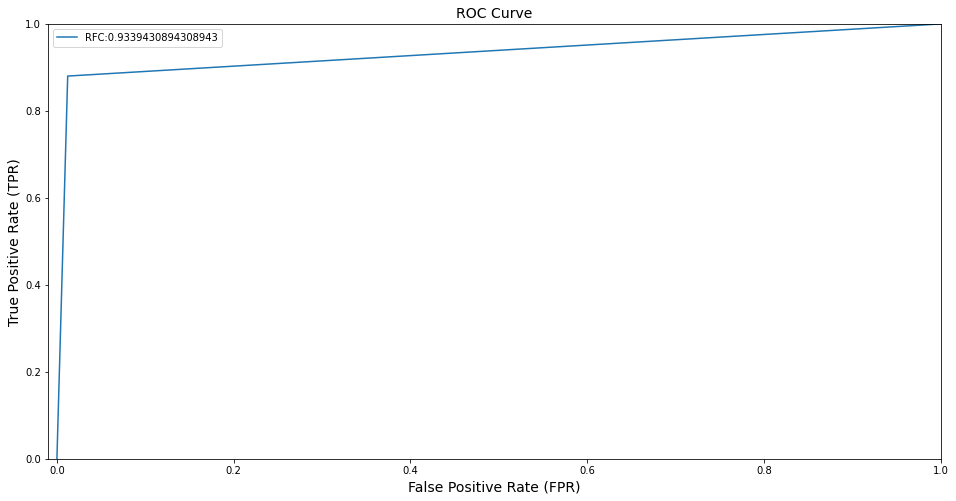

In [88]:
# 5 RFC AUC
graph_roc(RFC_fpr, RFC_tpr, 'RFC', roc_auc_score(y_under_sample, RFC_pred))

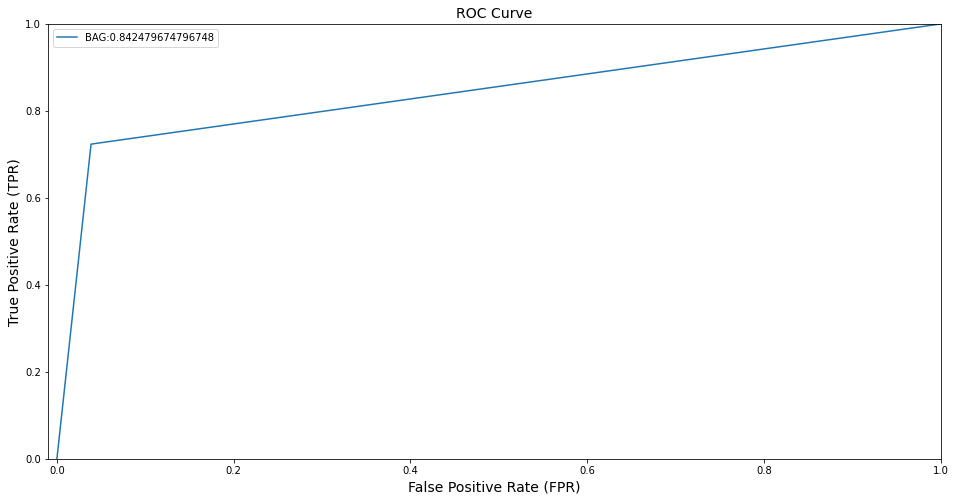

In [89]:
# 6 BAG AUC
graph_roc(BAG_fpr,BAG_tpr, 'BAG', roc_auc_score(y_under_sample, BAG_pred))

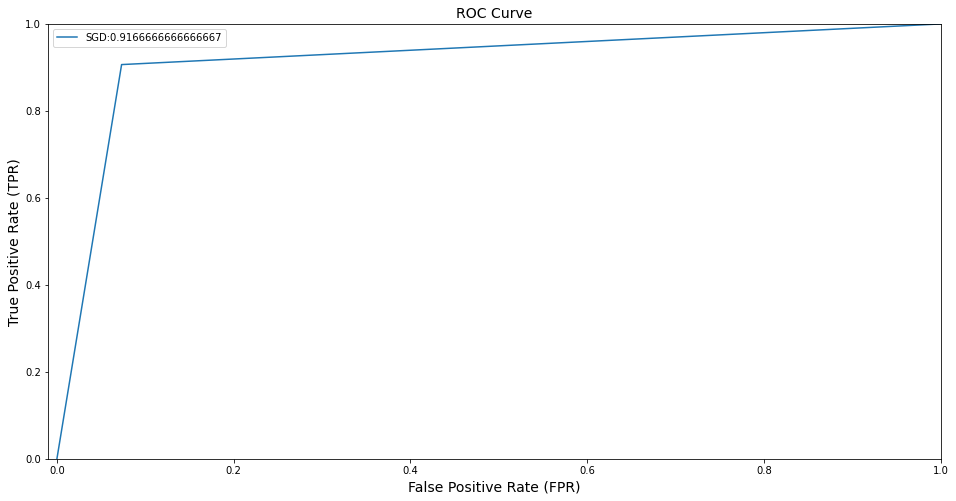

In [91]:
# 7 SGD AUC
graph_roc(SGD_fpr, SGD_tpr, 'SGD', roc_auc_score(y_under_sample, SGD_pred))

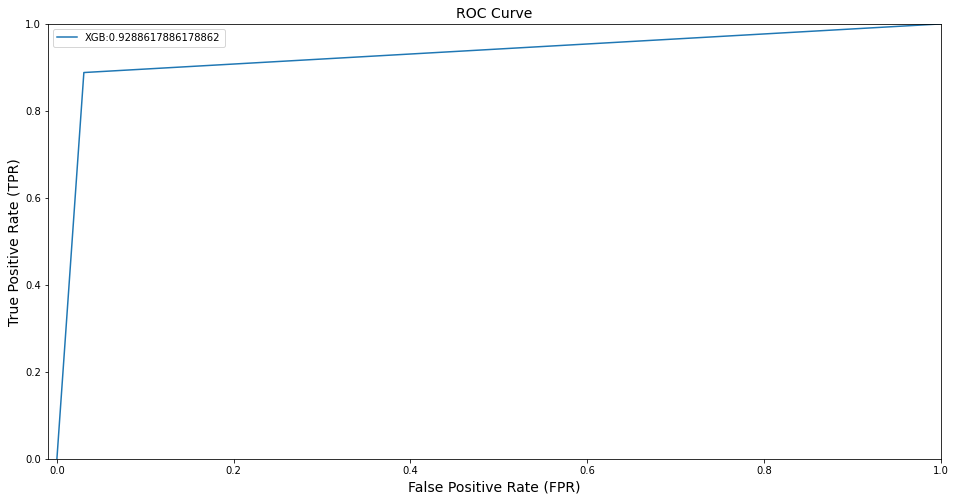

In [92]:
# 8 XGB AUC
graph_roc(XGB_fpr, XGB_tpr, 'XGB', roc_auc_score(y_under_sample, XGB_pred))